In [ ]:
!pip install graphviz

In [ ]:
from graphviz import Digraph
import time

# Grafo
def acao(destino, custo):
    return {'destino': destino, 'custo': custo}

estados_romenia = [
    { 'estado': 'Arad', 'acoes': [acao('Zerind', 75), acao('Sibiu', 140), acao('Timisoara', 118)] },
    { 'estado': 'Zerind', 'acoes': [acao('Arad', 75), acao('Oradea', 71)] },
    { 'estado': 'Timisoara', 'acoes': [acao('Arad', 118), acao('Lugoj', 111)] },
    { 'estado': 'Sibiu', 'acoes': [acao('Arad', 140), acao('Oradea', 151), acao('Fagaras', 99), acao('Rimnicu Vilcea', 80)] },
    { 'estado': 'Oradea', 'acoes': [acao('Zerind', 71), acao('Sibiu', 151)] },
    { 'estado': 'Lugoj', 'acoes': [acao('Timisoara', 111), acao('Mehadia', 70)] },
    { 'estado': 'Mehadia', 'acoes': [acao('Lugoj', 70), acao('Drobeta', 75)] },
    { 'estado': 'Drobeta', 'acoes': [acao('Mehadia', 75), acao('Craiova', 120)] },
    { 'estado': 'Craiova', 'acoes': [acao('Drobeta', 120), acao('Rimnicu Vilcea', 146), acao('Pitesti', 138)] },
    { 'estado': 'Rimnicu Vilcea', 'acoes': [acao('Sibiu', 80), acao('Craiova', 146), acao('Pitesti', 97)] },
    { 'estado': 'Fagaras', 'acoes': [acao('Sibiu', 99), acao('Bucharest', 211)] },
    { 'estado': 'Pitesti', 'acoes': [acao('Rimnicu Vilcea', 97), acao('Craiova', 138), acao('Bucharest', 101)] },
    { 'estado': 'Giurgiu', 'acoes': [acao('Bucharest', 90)] },
    { 'estado': 'Bucharest', 'acoes': [acao('Fagaras', 211), acao('Pitesti', 101), acao('Giurgiu', 90), acao('Urziceni', 85)] },
    { 'estado': 'Urziceni', 'acoes': [acao('Bucharest', 85), acao('Vaslui', 142), acao('Hirsova', 98)] },
    { 'estado': 'Hirsova', 'acoes': [acao('Urziceni', 98), acao('Eforie', 86)] },
    { 'estado': 'Eforie', 'acoes': [acao('Hirsova', 86)] },
    { 'estado': 'Vaslui', 'acoes': [acao('Urziceni', 142), acao('Iasi', 92)] },
    { 'estado': 'Iasi', 'acoes': [acao('Vaslui', 92), acao('Neamt', 87)] },
    { 'estado': 'Neamt', 'acoes': [acao('Iasi', 87)] }
]

# Material do código fonte
class No:
    def __init__(self, estado, custo, pai, acao):
        self.estado = estado
        self.custo = custo
        self.pai = pai
        self.acao = acao
        self.id = id(self)

    def filhos(self, problema):
        espaco_acoes = next(e for e in problema.espaco_estados if e['estado'] == self.estado)
        return [No(acao['destino'], self.custo + acao['custo'], self, acao['destino']) for acao in espaco_acoes['acoes']]

    def constroi_solucao(self):
        no_atual = self
        solucao = [no_atual]
        while no_atual.pai:
            no_atual = no_atual.pai
            solucao.insert(0, no_atual)
        return solucao

class Problema:
    def __init__(self, espaco_estados, inicial, objetivo):
        self.espaco_estados = espaco_estados
        self.inicial = inicial
        self.objetivo = objetivo

In [ ]:
BUSCA_INICIANDO = 0
BUSCA_FALHOU = 1
BUSCA_SUCESSO = 2

# Largura
class BuscaLargura:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def mostrar_passo(self, no):
        print("\n📍 Expandindo:", no.estado)
        print("   Fronteira:", [n.estado for n in self.fronteira])
        print("   Visitados:", self.visitados)

    def passo_busca(self):
        if self.situacao in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            return
        if not self.fronteira:
            self.situacao = BUSCA_FALHOU
            return
        no = self.fronteira.pop(0)
        self.mostrar_passo(no)
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return
        for filho in no.filhos(self.problema):
            if filho.estado not in self.visitados:
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)

    def executar(self):
        while self.situacao not in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            self.passo_busca()

# Profundidade
class BuscaProfundidade:
    def __init__(self, problema):
        self.problema = problema
        self.fronteira = [problema.inicial]
        self.visitados = [problema.inicial.estado]
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def mostrar_passo(self, no):
        print("\nNó-> Expandindo:", no.estado)
        print("   Fronteira:", [n.estado for n in self.fronteira])
        print("   Visitados:", self.visitados)

    def passo_busca(self):
        if self.situacao in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            return
        if not self.fronteira:
            self.situacao = BUSCA_FALHOU
            return
        no = self.fronteira.pop()
        self.mostrar_passo(no)
        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return
        for filho in reversed(no.filhos(self.problema)):
            if filho.estado not in self.visitados:
                self.fronteira.append(filho)
                self.visitados.append(filho.estado)

    def executar(self):
        while self.situacao not in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            self.passo_busca()

In [ ]:
# Desenho do caminho
def desenhar_arvore(solucao):
    dot = Digraph(comment='Árvore de Busca')
    for no in solucao:
        label = f"{no.estado}\n(custo: {no.custo})"
        dot.node(str(no.id), label)
        if no.pai:
            dot.edge(str(no.pai.id), str(no.id))
    return dot

🔎 Buscando de Arad para Bucharest usando LARGURA...


📍 Expandindo: Arad
   Fronteira: []
   Visitados: ['Arad']

📍 Expandindo: Zerind
   Fronteira: ['Sibiu', 'Timisoara']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara']

📍 Expandindo: Sibiu
   Fronteira: ['Timisoara', 'Oradea']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea']

📍 Expandindo: Timisoara
   Fronteira: ['Oradea', 'Fagaras', 'Rimnicu Vilcea']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu Vilcea']

📍 Expandindo: Oradea
   Fronteira: ['Fagaras', 'Rimnicu Vilcea', 'Lugoj']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu Vilcea', 'Lugoj']

📍 Expandindo: Fagaras
   Fronteira: ['Rimnicu Vilcea', 'Lugoj']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea', 'Fagaras', 'Rimnicu Vilcea', 'Lugoj']

📍 Expandindo: Rimnicu Vilcea
   Fronteira: ['Lugoj', 'Bucharest']
   Visitados: ['Arad', 'Zerind', 'Sibiu', 'Timisoara', 'Oradea'

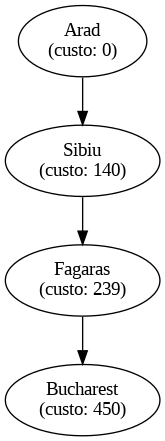

In [ ]:
# Teste
tipo_busca = "largura"  # largura ou "profundidade"
origem = "Arad"
destino = "Bucharest"

no_inicial = No(origem, 0, None, None)
problema = Problema(estados_romenia, no_inicial, lambda no: no.estado == destino)

print(f"🔎 Buscando de {origem} para {destino} usando {tipo_busca.upper()}...\n")

if tipo_busca == "largura":
    busca = BuscaLargura(problema)
elif tipo_busca == "profundidade":
    busca = BuscaProfundidade(problema)
else:
    raise ValueError("Tipo de busca inválido.")

inicio_tempo = time.time()
busca.executar()
fim_tempo = time.time()
tempo_execucao = fim_tempo - inicio_tempo


print(f"\n Nós visitados: {len(busca.visitados)}")
print(f" Profundidade da solução: {len(busca.solucao)}")
print(f" Custo total da solução: {busca.solucao[-1].custo}")
print(f" Tempo de execução: {tempo_execucao:.4f} segundos")

if busca.situacao == BUSCA_SUCESSO:
    print("\n✅ Caminho encontrado:")
    for no in busca.solucao:
        print(f"→ {no.estado} (custo: {no.custo})")
        print("\n\n")

    dot = desenhar_arvore(busca.solucao)
    dot.render('busca_romenia', format='png', cleanup=True)
    from IPython.display import Image
    display(Image(filename='busca_romenia.png'))
else:
    print("Busca falhou.")

In [ ]:
import time
from copy import deepcopy
from collections import deque

# print  do sudoku
def print_sudoku(board):
    for i in range(9):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        row = ""
        for j in range(9):
            if j % 3 == 0 and j != 0:
                row += "| "
            row += str(board[i][j]) + " "
        print(row)
    print()

# Verificação da condição do sudoku
def valido(board, num, pos):
    linha, coluna = pos
    if num in board[linha]: return False
    if num in [board[i][coluna] for i in range(9)]: return False
    bloco_x, bloco_y = (coluna // 3) * 3, (linha // 3) * 3
    for i in range(bloco_y, bloco_y + 3):
        for j in range(bloco_x, bloco_x + 3):
            if board[i][j] == num:
                return False
    return True

def encontrar_vazio(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return (i, j)
    return None

# Sudoku
class NoSudoku:
    def __init__(self, board, profundidade=0):
        self.board = board
        self.profundidade = profundidade

    def estado_tuple(self):
        return tuple(tuple(row) for row in self.board)

In [ ]:
# DFS
class BuscaSudokuDFS:
    def __init__(self, board):
        self.board = board
        self.visitados = 0
        self.solucao = None
        self.tempo = 0

    def resolver(self):
        inicio = time.time()
        sucesso = self._dfs(self.board)
        fim = time.time()
        self.tempo = fim - inicio
        return sucesso

    def _dfs(self, board):
        vazio = encontrar_vazio(board)
        if not vazio:
            self.solucao = board
            return True

        linha, coluna = vazio
        for num in range(1, 10):
            if valido(board, num, (linha, coluna)):
                board[linha][coluna] = num
                self.visitados += 1

                if self._dfs(board):
                    return True

                board[linha][coluna] = 0  # backtrack
        return False

# BFS
class BuscaSudokuBFS:
    def __init__(self, board):
        self.board = board
        self.visitados = 0
        self.solucao = None
        self.tempo = 0

    def resolver(self):
        inicio = time.time()
        fila = deque()
        fila.append(NoSudoku(deepcopy(self.board)))

        while fila:
            no = fila.popleft()
            self.visitados += 1

            vazio = encontrar_vazio(no.board)
            if not vazio:
                self.solucao = no.board
                self.tempo = time.time() - inicio
                return True

            linha, coluna = vazio
            for num in range(1, 10):
                if valido(no.board, num, (linha, coluna)):
                    novo_tabuleiro = deepcopy(no.board)
                    novo_tabuleiro[linha][coluna] = num
                    filho = NoSudoku(novo_tabuleiro, no.profundidade + 1)
                    fila.append(filho)

        self.tempo = time.time() - inicio
        return False

sudoku_teste = [
    [0, 0, 0, 2, 6, 0, 7, 0, 1],
    [6, 8, 0, 0, 7, 0, 0, 9, 0],
    [1, 9, 0, 0, 0, 4, 5, 0, 0],
    [8, 2, 0, 1, 0, 0, 0, 4, 0],
    [0, 0, 4, 6, 0, 2, 9, 0, 0],
    [0, 5, 0, 0, 0, 3, 0, 2, 8],
    [0, 0, 9, 3, 0, 0, 0, 7, 4],
    [0, 4, 0, 0, 5, 0, 0, 3, 6],
    [7, 0, 3, 0, 1, 8, 0, 0, 0]
]

In [ ]:
# Comparação

# DFS
dfs = BuscaSudokuDFS(deepcopy(sudoku_teste))
dfs.resolver()

# BFS
bfs = BuscaSudokuBFS(deepcopy(sudoku_teste))
bfs.resolver()

# Resultador
print("\n🧪 COMPARAÇÃO ENTRE BUSCA EM PROFUNDIDADE E LARGURA")
print("-" * 50)
print(" PROFUNDIDADE (DFS)")
print(f" Tempo: {dfs.tempo:.4f} s")
print(f" Nós visitados: {dfs.visitados}")
print(" Solução encontrada:" if dfs.solucao else "Falhou")
if dfs.solucao:
    print_sudoku(dfs.solucao)

print("-" * 50)
print(" LARGURA (BFS)")
print(f" Tempo: {bfs.tempo:.4f} s")
print(f" Nós visitados: {bfs.visitados}")
print(" Solução encontrada:" if bfs.solucao else "Falhou")
if bfs.solucao:
    print_sudoku(bfs.solucao)


🧪 COMPARAÇÃO ENTRE BUSCA EM PROFUNDIDADE E LARGURA
--------------------------------------------------
 PROFUNDIDADE (DFS)
 Tempo: 0.0005 s
 Nós visitados: 54
 Solução encontrada:
4 3 5 | 2 6 9 | 7 8 1 
6 8 2 | 5 7 1 | 4 9 3 
1 9 7 | 8 3 4 | 5 6 2 
---------------------
8 2 6 | 1 9 5 | 3 4 7 
3 7 4 | 6 8 2 | 9 1 5 
9 5 1 | 7 4 3 | 6 2 8 
---------------------
5 1 9 | 3 2 6 | 8 7 4 
2 4 8 | 9 5 7 | 1 3 6 
7 6 3 | 4 1 8 | 2 5 9 

--------------------------------------------------
 LARGURA (BFS)
 Tempo: 0.0036 s
 Nós visitados: 69
 Solução encontrada:
4 3 5 | 2 6 9 | 7 8 1 
6 8 2 | 5 7 1 | 4 9 3 
1 9 7 | 8 3 4 | 5 6 2 
---------------------
8 2 6 | 1 9 5 | 3 4 7 
3 7 4 | 6 8 2 | 9 1 5 
9 5 1 | 7 4 3 | 6 2 8 
---------------------
5 1 9 | 3 2 6 | 8 7 4 
2 4 8 | 9 5 7 | 1 3 6 
7 6 3 | 4 1 8 | 2 5 9 



In [ ]:
import heapq
import math

# Adicionando a heurística para a Romênia (distância em linha reta até Bucareste)
heuristica_romenia_bucareste = {
    'Arad': 366,
    'Bucharest': 0,
    'Craiova': 160,
    'Drobeta': 242,
    'Eforie': 161,
    'Fagaras': 176,
    'Giurgiu': 77,
    'Hirsova': 151,
    'Iasi': 226,
    'Lugoj': 244,
    'Mehadia': 241,
    'Neamt': 234,
    'Oradea': 380,
    'Pitesti': 100,
    'Rimnicu Vilcea': 193,
    'Sibiu': 253,
    'Timisoara': 329,
    'Urziceni': 80,
    'Vaslui': 199,
    'Zerind': 374
}

class NoAEstrela(No):
    def __init__(self, estado, custo, pai, acao, heuristica):
        super().__init__(estado, custo, pai, acao)
        self.heuristica = heuristica
        self.prioridade = custo + heuristica  # f(n) = g(n) + h(n)

    def __lt__(self, other):
        return self.prioridade < other.prioridade

class BuscaAEstrela:
    def __init__(self, problema, heuristica):
        self.problema = problema
        self.heuristica = heuristica
        no_inicial = NoAEstrela(
            problema.inicial.estado,
            problema.inicial.custo,
            None,
            None,
            heuristica.get(problema.inicial.estado, 0)
        )
        self.fronteira = []
        heapq.heappush(self.fronteira, no_inicial)
        self.visitados = set()
        self.visitados.add(no_inicial.estado)
        self.solucao = []
        self.situacao = BUSCA_INICIANDO

    def mostrar_passo(self, no):
        print("\n📍 Expandindo:", no.estado)
        print("   Custo atual:", no.custo)
        print("   Heurística:", no.heuristica)
        print("   Prioridade (f(n)):", no.prioridade)
        print("   Fronteira:", [n.estado for n in self.fronteira])
        print("   Visitados:", self.visitados)

    def passo_busca(self):
        if self.situacao in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            return
        if not self.fronteira:
            self.situacao = BUSCA_FALHOU
            return

        no = heapq.heappop(self.fronteira)
        self.mostrar_passo(no)

        if self.problema.objetivo(no):
            self.situacao = BUSCA_SUCESSO
            self.solucao = no.constroi_solucao()
            return

        for acao in next(e for e in self.problema.espaco_estados if e['estado'] == no.estado)['acoes']:
            estado_filho = acao['destino']
            custo_filho = no.custo + acao['custo']
            heuristica_filho = self.heuristica.get(estado_filho, 0)
            filho = NoAEstrela(estado_filho, custo_filho, no, estado_filho, heuristica_filho)

            if estado_filho not in self.visitados or custo_filho < filho.custo:
                heapq.heappush(self.fronteira, filho)
                self.visitados.add(estado_filho)

    def executar(self):
        while self.situacao not in [BUSCA_SUCESSO, BUSCA_FALHOU]:
            self.passo_busca()

# 1. Implementação do A* usando heapq
print("\n" + "="*50)
print("1. Implementação do Algoritmo A*")
print("="*50)

# 2. Resolvendo problema de Arad a Bucareste
print("\n" + "="*50)
print("2. De Arad a Bucareste")
print("="*50)
no_inicial = No('Arad', 0, None, None)
problema = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')
busca_aestrela = BuscaAEstrela(problema, heuristica_romenia_bucareste)
busca_aestrela.executar()

if busca_aestrela.situacao == BUSCA_SUCESSO:
    print("\n✅ Caminho encontrado:")
    for no in busca_aestrela.solucao:
        print(f"→ {no.estado} (custo acumulado: {no.custo}, heurística: {no.heuristica}, f(n): {no.prioridade})")
    print(f"\nCusto total: {busca_aestrela.solucao[-1].custo}")
    print(f"Nós expandidos: {len(busca_aestrela.visitados)}")
else:
    print("Busca falhou.")

# 3. Buscando de outras cidades para Bucareste
print("\n" + "="*50)
print("3. De outras cidades para Bucareste")
print("="*50)

# a) De Timisoara a Bucareste
print("\nDe Timisoara a Bucareste:")
no_inicial = No('Timisoara', 0, None, None)
problema = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')
busca_aestrela = BuscaAEstrela(problema, heuristica_romenia_bucareste)
busca_aestrela.executar()

if busca_aestrela.situacao == BUSCA_SUCESSO:
    print("\n✅ Caminho encontrado:")
    for no in busca_aestrela.solucao:
        print(f"→ {no.estado} (custo: {no.custo})")
else:
    print("Busca falhou.")

# b) De Oradea a Bucareste
print("\nDe Oradea a Bucareste:")
no_inicial = No('Oradea', 0, None, None)
problema = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Bucharest')
busca_aestrela = BuscaAEstrela(problema, heuristica_romenia_bucareste)
busca_aestrela.executar()

if busca_aestrela.situacao == BUSCA_SUCESSO:
    print("\n✅ Caminho encontrado:")
    for no in busca_aestrela.solucao:
        print(f"→ {no.estado} (custo: {no.custo})")
else:
    print("Busca falhou.")

# 4. Nova heurística para outro destino (ex: de Arad para Craiova)
print("\n" + "="*50)
print("4. Nova heurística para outro destino (Arad para Craiova)")
print("="*50)

# Heurística aproximada (distâncias em linha reta fictícias para exemplo)
heuristica_romenia_craiova = {
    'Arad': 200,
    'Bucharest': 160,
    'Craiova': 0,
    'Drobeta': 50,
    'Eforie': 300,
    'Fagaras': 180,
    'Giurgiu': 200,
    'Hirsova': 280,
    'Iasi': 350,
    'Lugoj': 150,
    'Mehadia': 100,
    'Neamt': 380,
    'Oradea': 250,
    'Pitesti': 80,
    'Rimnicu Vilcea': 120,
    'Sibiu': 150,
    'Timisoara': 180,
    'Urziceni': 200,
    'Vaslui': 280,
    'Zerind': 220
}

print("\nDe Arad a Craiova:")
no_inicial = No('Arad', 0, None, None)
problema = Problema(estados_romenia, no_inicial, lambda no: no.estado == 'Craiova')
busca_aestrela = BuscaAEstrela(problema, heuristica_romenia_craiova)
busca_aestrela.executar()

if busca_aestrela.situacao == BUSCA_SUCESSO:
    print("\n✅ Caminho encontrado:")
    for no in busca_aestrela.solucao:
        print(f"→ {no.estado} (custo: {no.custo})")
else:
    print("Busca falhou.")

# 5. Resolvendo outro problema com A* (ex: quebra-cabeça de 8 peças)
print("\n" + "="*50)
print("5. Resolvendo o problema do Quebra-Cabeça de 8 Peças com A*")
print("="*50)

# Implementação básica do problema do 8-puzzle
class NoQuebraCabeca(NoAEstrela):
    def __init__(self, estado, custo, pai, acao, heuristica):
        super().__init__(estado, custo, pai, acao, heuristica)

    def filhos(self, problema):
        filhos = []
        estado = self.estado
        i, j = next((i, j) for i, row in enumerate(estado) for j, val in enumerate(row) if val == 0)

        for di, dj, acao in [(-1, 0, 'Cima'), (1, 0, 'Baixo'), (0, -1, 'Esquerda'), (0, 1, 'Direita')]:
            ni, nj = i + di, j + dj
            if 0 <= ni < 3 and 0 <= nj < 3:
                novo_estado = [list(row) for row in estado]
                novo_estado[i][j], novo_estado[ni][nj] = novo_estado[ni][nj], novo_estado[i][j]
                h = problema.heuristica(novo_estado)
                filhos.append(NoQuebraCabeca(tuple(map(tuple, novo_estado)), self.custo + 1, self, acao, h))
        return filhos

def heuristica_hamming(estado):
    objetivo = ((1, 2, 3), (4, 5, 6), (7, 8, 0))
    return sum(1 for i in range(3) for j in range(3) if estado[i][j] != objetivo[i][j] and estado[i][j] != 0)

def heuristica_manhattan(estado):
    objetivo = {1: (0, 0), 2: (0, 1), 3: (0, 2),
                4: (1, 0), 5: (1, 1), 6: (1, 2),
                7: (2, 0), 8: (2, 1), 0: (2, 2)}
    distancia = 0
    for i in range(3):
        for j in range(3):
            val = estado[i][j]
            if val != 0:
                gi, gj = objetivo[val]
                distancia += abs(i - gi) + abs(j - gj)
    return distancia

class ProblemaQuebraCabeca:
    def __init__(self, inicial, heuristica):
        self.inicial = inicial
        self.heuristica = heuristica

    def objetivo(self, no):
        objetivo = ((1, 2, 3), (4, 5, 6), (7, 8, 0))
        return no.estado == objetivo

# Exemplo de uso
estado_inicial = ((1, 2, 3), (4, 0, 6), (7, 5, 8))
no_inicial = NoQuebraCabeca(estado_inicial, 0, None, None, heuristica_manhattan(estado_inicial))
problema = ProblemaQuebraCabeca(no_inicial, heuristica_manhattan)

print("Estado inicial:")
for row in estado_inicial:
    print(row)

print("\nResolvendo com A* e heurística Manhattan...")
busca_aestrela = BuscaAEstrela(problema, lambda e: heuristica_manhattan(e))
busca_aestrela.executar()

if busca_aestrela.situacao == BUSCA_SUCESSO:
    print("\n✅ Solução encontrada:")
    for i, no in enumerate(busca_aestrela.solucao):
        print(f"Passo {i}: {no.acao}")
        for row in no.estado:
            print(row)
        print()
else:
    print("Busca falhou.")


1. Implementação do Algoritmo A*

2. De Arad a Bucareste

📍 Expandindo: Arad
   Custo atual: 0
   Heurística: 366
   Prioridade (f(n)): 366
   Fronteira: []
   Visitados: {'Arad'}

📍 Expandindo: Sibiu
   Custo atual: 140
   Heurística: 253
   Prioridade (f(n)): 393
   Fronteira: ['Timisoara', 'Zerind']
   Visitados: {'Sibiu', 'Zerind', 'Timisoara', 'Arad'}

📍 Expandindo: Rimnicu Vilcea
   Custo atual: 220
   Heurística: 193
   Prioridade (f(n)): 413
   Fronteira: ['Fagaras', 'Timisoara', 'Oradea', 'Zerind']
   Visitados: {'Arad', 'Timisoara', 'Rimnicu Vilcea', 'Zerind', 'Fagaras', 'Sibiu', 'Oradea'}

📍 Expandindo: Fagaras
   Custo atual: 239
   Heurística: 176
   Prioridade (f(n)): 415
   Fronteira: ['Pitesti', 'Timisoara', 'Oradea', 'Zerind', 'Craiova']
   Visitados: {'Pitesti', 'Arad', 'Craiova', 'Timisoara', 'Rimnicu Vilcea', 'Zerind', 'Fagaras', 'Sibiu', 'Oradea'}

📍 Expandindo: Pitesti
   Custo atual: 317
   Heurística: 100
   Prioridade (f(n)): 417
   Fronteira: ['Timisoara', 'Z

AttributeError: 'function' object has no attribute 'get'